In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Define a function to integrate

In [28]:
def dfdx(x,f):
    return x**2+x

## Define its integral

In [29]:
def f_int(x,C):
    return(x**3)/3+.5*x**2+C

## Define the 2nd order RK method

In [30]:
def rk2_core(x_i,f_i,h,g):
    #advance f by a step h
    
    #half step
    x_ipoh=x_i+.5*h
    f_ipoh=f_i+.5*h*g(x_i,f_i)
    
    #full step
    f_ipo=f_i+h*g(x_ipoh, f_ipoh)
    return f_ipo

## define a wrapper routine for RK2

In [31]:
def rk2(dfdx,a,b,f_a,N):
        #dfdx is derivative, a is lower bound, b is upper bound, f_a is the boundary condition
        #at a, N is the number of steps
        
        #define steps
        x=np.linspace(a,b,N)
        
        #a single step size
        h=x[1]-x[0]
        
        #an array to hold f
        f=np.zeros(N,dtype=float)
        
        f[0]=f_a #value of f at a
        
        #evolve f along x
        for i in range(1,N):
            f[i]=rk2_core(x[i-1],f[i-1],h,dfdx)
        return x,f

## Define RK4 method

In [32]:
def rk4_core(x_i,f_i,h,g):
    #define x at 1/2 step
    x_ipoh=x_i+.5*h
    
    #define x at 1 step
    x_ipo=x_i+h
    
    #advance f by a step h
    k_1=h*g(x_i,f_i)
    k_2=h*g(x_ipoh,f_i +.5*k_1)
    k_3=h*g(x_ipoh,f_i+.5*k_2)
    k_4=h*g(x_ipo,f_i+k_3)
            
    f_ipo=f_i+(k_1+2*k_2+2*k_3+k_4)/6
            
    return f_ipo

## Define a wrapper for RK4

In [33]:
def rk4(dfdx,a,b,f_a,N):
        #dfdx is derivative, a is lower bound, b is upper bound, f_a is the boundary condition
        #at a, N is the number of steps
        
        #define steps
        x=np.linspace(a,b,N)
        
        #a single step size
        h=x[1]-x[0]
        
        #an array to hold f
        f=np.zeros(N,dtype=float)
        
        f[0]=f_a #value of f at a
        
        #evolve f along x
        for i in range(1,N):
            f[i]=rk4_core(x[i-1],f[i-1],h,dfdx)
        return x,f

## Perform integration

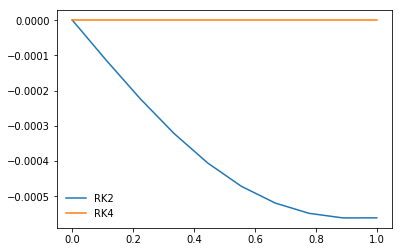

In [43]:
a=0
b=1
f_a=1
N=10
x_2, f_2=rk2(dfdx,a,b,f_a,N)
x_4,f_4=rk4(dfdx,a,b,f_a,N)
f_analytic=f_int(x,f_a)
error2=(f_2-f_analytic)/f_analytic
error4=(f_4-f_analytic)/f_analytic
x=x_2.copy()
plt.plot(x_2,error2,label='RK2')
plt.plot(x_4,error4,label='RK4')
#plt.plot(x,f_int(x,f_a),'o',label='analyltic')
plt.legend(frameon=False)